dis = 24 at grid = 256


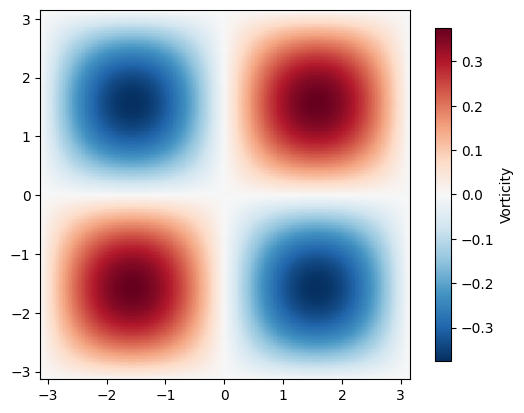

velave=0.12702604489791616, velmax=0.1875
nu=0.014726215563702155
Re=54.19777915644423


In [7]:
%reset -f
import sys
sys.path.insert(1, '/code/')
import os
import numpy as np
import lattice_pi
from importlib import reload; reload(lattice_pi)
from lattice_pi import *
import matplotlib.pyplot as plt
###################### parameter ########################
n=256; pi=np.pi
c = lattice_pi.qD2Q9(nx=n,ny=n, xmin=-pi, xmax=pi, ymin=-pi, ymax=pi) 
q=int(np.log2(c.nx))
ratio=0.2
Gamma=1.5  #这个就是涡通量
sigma=0.1*pi
dis=math.floor(12/128*n); deltax=0; deltay=0
c.step = 1
m_th = 3
rho = np.ones((c.ny,c.nx))
dt = 2/c.nx
nu = 1.2*2*pi/n
###################### initial field  ###########################
# v1=c.Gauss_vortex(n/2+dis+deltax, n/2+deltay, +Gamma, sigma) 
# v2=c.Gauss_vortex(n/2-dis+deltax, n/2+deltay, +Gamma, sigma) 
# print(f'dis = {dis} at grid = {n}')
# vor = v1+v2
# psi = c.vor_to_psi(vor)
# u,v = c.psi_to_vel(psi)
gamma = 1; u,v = c.init_TG(gamma)
vor = c.vorcitity(u,v)
c.plot(vor)
tempvel = np.sqrt(u*u+v*v)
speed = np.average(tempvel); maxspeed = np.max(tempvel)

print(f"velave={speed}, velmax={maxspeed}")
print(f"nu={nu}")
print(f"Re={speed*(c.xmax-c.xmin)/nu}")

feq = c.get_equil(rho,u,v) 
f = copy.deepcopy(feq) 
# config = c.f_to_config(f)

realtime = 4
print_number = 4
out_it = math.floor(realtime/print_number/dt)
ti=0; time=math.floor(realtime/dt)
# coll_coef_list = [1,1,1,1]
# coll_coef_list = [0.75,0.75,0.75,0.75]
coll_coef_list = [0.5,0.5,0.5,0.5]
# coll_coef_list = [0.25,0.25,0.25,0.25]
rho,u,v,epsilon = c.f_to_macro_thermal(f)
nu = epsilon/(coll_coef_list[0]*epsilon**2+coll_coef_list[2]*(1-epsilon)**2)
nu = np.average(nu)
print(f"vis = {nu}")
# ens = []
# energy = []
# velmax = []
# vormax = []
# for i in range(ti,time+1):
#     config = c.q_collide_Chen(config, coll_coef_list)
#     config = c.q_convect(config,m_th) # 平移f，每步移动step步
#     f = c.config_to_f(config)
#     config = c.f_to_config(f)
#     rho,u,v,epsilon = c.f_to_macro_thermal(f)
#     vor = c.vorcitity(u,v)
#     ens.append(get_enstrophy(vor))
#     energy.append(get_enstrophy(u)+get_enstrophy(v))
#     velmax.append( np.sqrt(np.max(u*u+v*v)))
#     vormax.append( np.sqrt(np.max(vor*vor)))
#     if (i) % out_it == 0:  
#         print(f"Time={i*dt}") 
#         print(f"it= {i}")
#         formatted_time = "{:.2f}".format(i*dt)
#         formatted_nu = "{:.1f}".format(nu)
#         np.save( 'vor_t='+formatted_time+'_nu='+formatted_nu+'_n='+str(n)+'.npy', vor)
#         c.plot(vor)
# ens = np.array(list(map(float, ens)))
# energy = np.array(list(map(float, energy)))
# velmax = np.array(list(map(float, velmax)))
# vormax = np.array(list(map(float, vormax)))
# time_axis = np.arange(len(ens)) * dt

数据已成功写入到 n=512_nu=1.2_TG.csv


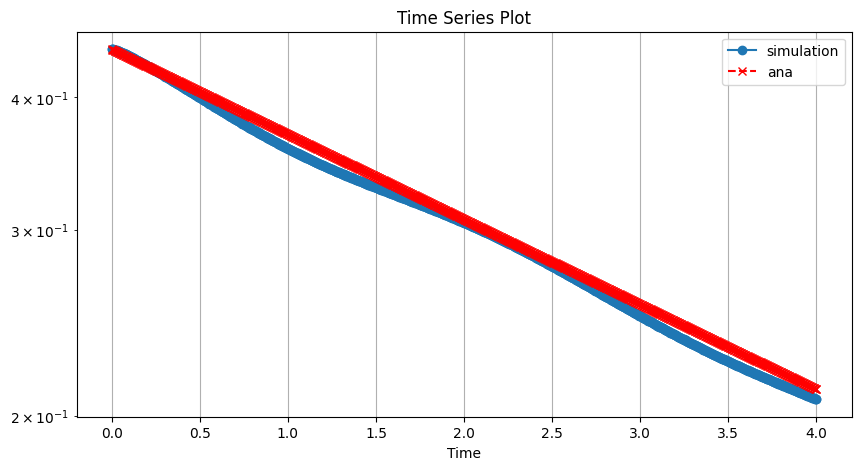

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
time_axis = np.arange(len(ens)) * dt
coef = -4*pi**2*(nu*dt)*time_axis
ens_ana = 2*np.exp(coef)*gamma**2
energy_ana = gamma**2/np.pi**2*np.exp(coef)
velmax_ana = gamma/np.pi*np.exp(coef/2)
vormax_ana = 2*gamma*np.exp(coef/2)

plt.figure(figsize=(10, 5))
plt.plot(time_axis, ens, label='simulation', marker='o', linestyle='-')
plt.plot(time_axis, ens_ana, label='ana', marker='x', linestyle='--', color='red')
plt.yscale('log')

plt.title('Time Series Plot')
plt.xlabel('Time')
plt.legend()
plt.grid(True)

# data = {
#     'Time': time_axis,
#     'energy': energy,
#     'enstrophy': ens,
#     'max_vel': velmax,
#     'max_vor': vormax
# }
# # data = {
# #     'Time': time_axis,
# #     'energy': energy_ana,
# #     'enstrophy': ens_ana,
# #     'max_vel': velmax_ana,
# #     'max_vor': vormax_ana
# # }
# df = pd.DataFrame(data)

# formatted_nu = "{:.1f}".format(nu)
# output_file_path = 'n='+str(n)+'_nu='+formatted_nu+'_TG.csv' 
# # output_file_path = 'n='+str(n)+'_nu='+formatted_nu+'_TG_ref.csv' 
# df.to_csv(output_file_path, index=False)  

# print(f"数据已成功写入到 {output_file_path}")